<a href="https://colab.research.google.com/github/mhuda-anshory/Github-Search/blob/main/IDCamp_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyek Analisis Data: [E-Commerce Public Dataset]
Nama: [M Huda Anshory]
Email: [mhuda.anshory@gmail.com]
ID Dicoding: [m_huda_anshory]

Menentukan Pertanyaan Bisnis
1. Produk apa dengan jumlah pembelian terbesar?
2. Berapa tingkat kepuasan pembeli terhadap layanan?
3. Bagaimana data pembelian order setiap bulan

Library


In [80]:
pip install unidecode

In [81]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import datetime as dt

DATA WRANGLING

Import Dataset yang terlebih dahulu di upload di google collab


In [82]:
df_customers = pd.read_csv('/content/dataset/customers_dataset.csv')
df_customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [83]:
df_geolocation = pd.read_csv('/content/dataset/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [84]:
df_order_items = pd.read_csv('/content/dataset/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [85]:
df_order_payments = pd.read_csv('/content/dataset/order_payments_dataset.csv')
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [86]:
df_order_reviews = pd.read_csv('/content/dataset/order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [87]:
df_orders = pd.read_csv('/content/dataset/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [88]:
df_product_category = pd.read_csv('/content/dataset/product_category_name_translation.csv')
df_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [89]:
df_products = pd.read_csv('/content/dataset/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [90]:
df_sellers = pd.read_csv('/content/dataset/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Accesing data

In [100]:
df_orders.info()
df_customers.info()
df_order_items.info()
df_order_payments.info()
df_order_reviews.info()
df_products.info()
df_product_category.info()
df_geolocation.info()
df_sellers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64966 entries, 0 to 64965
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       64966 non-null  object        
 1   customer_id                    64966 non-null  object        
 2   order_status                   64966 non-null  object        
 3   order_purchase_timestamp       64966 non-null  datetime64[ns]
 4   order_approved_at              64856 non-null  datetime64[ns]
 5   order_delivered_carrier_date   63807 non-null  datetime64[ns]
 6   order_delivered_customer_date  63023 non-null  datetime64[ns]
 7   order_estimated_delivery_date  64966 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
-

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Cek Nilai Null masing2 dataframe

In [92]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 110
order_delivered_carrier_date     1159
order_delivered_customer_date    1943
order_estimated_delivery_date       0
dtype: int64

In [ ]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              1
dtype: int64

In [ ]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              1
shipping_limit_date    1
price                  1
freight_value          1
dtype: int64

In [ ]:
df_order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
df_order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
df_product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                1
geolocation_city               1
geolocation_state              1
dtype: int64

In [ ]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Cek Data Duplikat

In [ ]:
print(f'total duplicate customers        = {df_customers.duplicated().sum()}\n'
      f'total duplicate geolocation      = {df_geolocation.duplicated().sum()}\n'
      f'total duplicate order items      = {df_order_items.duplicated().sum()}\n'
      f'total duplicate order payment    = {df_order_payments.duplicated().sum()}\n'
      f'total duplicate order review     = {df_order_reviews.duplicated().sum()}\n'
      f'total duplicate order            = {df_orders.duplicated().sum()}\n'
      f'total duplicate products         = {df_products.duplicated().sum()}\n'
      f'total duplicate seller           = {df_sellers.duplicated().sum()}\n'
      f'total duplicate product category = {df_product_category.duplicated().sum()}\n'
      )

total duplicate customers        = 0
total duplicate geolocation      = 41844
total duplicate order items      = 0
total duplicate order payment    = 0
total duplicate order review     = 0
total duplicate order            = 0
total duplicate products         = 0
total duplicate seller           = 0
total duplicate product category = 0



Describe Data

In [96]:
df_orders.describe()
df_customers.describe()
df_order_items.describe()
df_order_payments.describe()
df_order_reviews.describe()
df_products.describe()
df_product_category.describe()
df_geolocation.describe()
df_sellers.describe()


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Cleaning Data

Mengubah object/str menjadi datetime


In [ ]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col: df_orders[col]=pd.to_datetime(df_orders[col])
df_orders.describe()

In [ ]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    df_order_reviews[col]=pd.to_datetime(df_order_reviews[col])
df_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
order_item_col=['shipping_limit_date']
for col in order_item_col:
    df_order_items[col]=pd.to_datetime(df_order_items[col])
df_order_items.describe()

,order_item_id,price,freight_value
count,107066.000000,107065.000000,107065.000000
mean,1.197850,120.657179,19.986899
std,0.707116,182.057155,15.804842
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.070000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Menghapus Data Duplikat


In [ ]:
df_geolocation.drop_duplicates(inplace=True)
df_geolocation.duplicated().sum()

0

Melakukan data Cleaning Null

In [ ]:
df_order_reviews.isna().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Mengubah kolom review_comment_title dan review_comment_message yang benilai null menjadi "No Title" dan "No Comment"

In [ ]:
df_order_reviews["review_comment_title"].fillna("No Title", inplace=True)
df_order_reviews["review_comment_message"].fillna("No Comment", inplace=True)

In [ ]:
df_order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Disini kita membiarkan null value df_order dan df_product karena terlau riskan jika dihapus, kebanyakan data tanggal 4 kolom order dan data deskripsi product

Exploratory Data Analysis (EDA)

In [ ]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
23078,fbfdd7fe2c8685586b7e44a2970d0727,c1cc954b06668342ccc7aa28f90fac83,3266,sao paulo,SP
23079,88bf6f648e00e223da6d2d0cbad14ede,95a83038c5ef655802b77358c6c0f204,18017,sorocaba,SP
23080,da9ef0f242177bd1de0ce7394f41a6f6,d96579e3cfb6d4f233fc048ecc6c0b12,35790,curvelo,MG
23081,bdf1861e7bc387ae207eaf08463576b5,6ef157b9dbeb8f79b07a06de1cfeae4e,35053,governador valadares,MG


In [ ]:
df_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,23083,23083,23083.000000,23083,23082
unique,23083,22881,NaN,2410,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,3e43e6105506432c953e165fb2acf44c,NaN,sao paulo,SP
freq,1,5,NaN,3667,9670
mean,NaN,NaN,34918.800113,NaN,NaN
std,NaN,NaN,29708.330060,NaN,NaN
min,NaN,NaN,1004.000000,NaN,NaN
25%,NaN,NaN,11310.000000,NaN,NaN
50%,NaN,NaN,24320.000000,NaN,NaN
75%,NaN,NaN,58071.500000,NaN,NaN


diketahui bahwa df_customer memiliki customer_id yang unik itu menunjukan bahwa kolom tersebur adalah primary key

mencari dari mana kota pelanggan berasal dan di urutkan berdasar terbanyak?

In [ ]:
df_customers.groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

customer_city
sao paulo          3667
rio de janeiro     1642
belo horizonte      657
brasilia            477
curitiba            344
                   ... 
jacinto machado       1
jacinto               1
jaci                  1
jaboticatubas         1
zortea                1
Name: customer_id, Length: 2410, dtype: int64

Explore df_geolocation

In [101]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
104961,4726,-23.635808,-46.712098,sao paulo,SP
104962,4719,-23.633081,-46.705886,são paulo,SP
104963,4717,-23.633909,-46.701057,sao paulo,SP
104964,4777,-23.694716,-46.699364,sao paulo,SP


decode city untuk format yang tidak sesuai


In [113]:
(df_geolocation['geolocation_city']=='são paulo').sum()

16412

In [111]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104966 entries, 0 to 104965
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  104966 non-null  int64  
 1   geolocation_lat              104966 non-null  float64
 2   geolocation_lng              104965 non-null  float64
 3   geolocation_city             104965 non-null  object 
 4   geolocation_state            104965 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ MB


In [125]:
pip install unidecode

In [ ]:
df_geolocation['geolocation_city']=df_geolocation['geolocation_city'].apply(lambda x: unidecode(x))

In [108]:
(df_geolocation['geolocation_city']=='são paulo').sum()

16412

Melihat group  geo location

In [ ]:
df_geolocation.groupby(by=['geolocation_city','geolocation_state'])['geolocation_zip_code_prefix'].size().sort_values(ascending=False).reset_index()


,geolocation_city,geolocation_state,geolocation_zip_code_prefix
0,sao paulo,SP,50175
1,são paulo,SP,12939
2,jundiaí,SP,1
3,sao bernardo do campo,SP,1
4,sao paulo,AC,1
5,sp,SP,1
6,são paulo,RN,1
7,sãopaulo,SP,1
8,taboão da serra,SP,1


Melihat Jenis Pembayaran

In [127]:
df_order_payments.groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: order_id, dtype: int64

Menggabungkan customers dan order

In [128]:
cust_orders_df=pd.merge(left=df_customers, right=df_orders,how="left",left_on="customer_id", right_on="customer_id")
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN


Menggabungkan product dan detail product_category

In [129]:
merge_product_detail=pd.merge(left=df_products, right=df_product_category, how="left", left_on="product_category_name", right_on="product_category_name")

In [130]:
merge_product_detail.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


memindahkan product in english disamping product name

In [131]:
col_english=merge_product_detail.pop("product_category_name_english")
merge_product_detail.insert(2,col_english.name,col_english)
merge_product_detail.head()

,product_id,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [132]:
df_order_payments.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4230,d94600e5b855ffe8db3b9bc06e21b1bd,1,boleto,1,57.36
16050,8b29c8a606c98ea835750427eeb92ae2,1,boleto,1,147.15
24724,7899f1c17f7910367d21b9821e228538,1,credit_card,1,47.64
50769,40f7051042336b961ed4d8170f73bd41,1,credit_card,6,68.22
41357,96a3e667da37fbf1a734e7ac4cfb566b,1,boleto,1,45.64
52354,a5efe4e83ffd7dbdb8c8102c47331c63,1,boleto,1,97.87
49511,4c16e2f2793eec4da8f68fd77b2a092a,1,credit_card,3,49.18
10238,9c9caceea6d2d83cca38b235e4239dbc,1,credit_card,1,372.28
57144,76c3c8013bea9128879c13688ea5ff32,1,credit_card,1,104.65
40719,d4de2912c79702221bd12d642b18e49f,1,credit_card,8,558.92


In [133]:
cust_order_payments=pd.merge(
    left=cust_orders_df,
    right=df_order_payments,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
cust_order_payments.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN


In [135]:
cust_order_payment_detail=pd.merge(
    left=cust_order_payments,
    right=df_order_items,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
cust_order_payment_detail.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
full_df=pd.merge(
    left=cust_order_payment_detail,
    right=merge_product_detail,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
full_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
finish_df=pd.merge(
    left=full_df,
    right=df_sellers,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)
finish_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
pd.set_option('display.max_columns', None)

In [140]:
all_df=pd.merge(
    left=finish_df,
    right=df_order_reviews,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,office_furniture,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,8577.0,itaquaquecetuba,SP,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,office_furniture,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,8577.0,itaquaquecetuba,SP,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
all_df.describe()

,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,review_score
count,111628.000000,77150.000000,77150.000000,77150.000000,73236.000000,73236.000000,73236.000000,72183.000000,72183.000000,72183.000000,73222.000000,73222.000000,73222.000000,73222.000000,73236.000000,76526.000000
mean,35088.132467,1.086507,2.941828,171.551804,1.190098,120.882725,20.035262,48.766399,785.806090,2.205311,2112.964205,30.329259,16.586777,23.117574,24411.106000,4.020411
std,29788.910084,0.654107,2.775666,277.419972,0.650878,183.636547,15.756784,10.061333,652.340034,1.714644,3774.149427,16.271765,13.446659,11.811851,27563.797789,1.395302
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,7.000000,1001.000000,1.000000
25%,11380.000000,1.000000,1.000000,60.850000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,4.000000
50%,24342.000000,1.000000,2.000000,107.780000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13566.000000,5.000000
75%,58677.500000,1.000000,4.000000,187.910000,1.000000,134.900000,21.150000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27277.000000,5.000000
max,99990.000000,29.000000,24.000000,13664.080000,15.000000,6735.000000,409.680000,76.000000,3992.000000,18.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,5.000000


RFM : Mencari tanggal transaksi max min

In [142]:
all_df['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [143]:
all_df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [144]:
now=dt.datetime(2018,10,20)

In [145]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_df.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_df.groupby('customer_id')['order_id'].count()
monetary = all_df.groupby('customer_id')['price'].sum()

# Create a new DataFrame with the calculated metrics
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

In [146]:
col_list = ['customer_id','Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.sort_values(by='Recency',ascending=True)

,customer_id,Recency,Frequency,Monetary
63970,a4b417188addbc05b26b72d5e44837a1,2.0,1,0.0
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,16.0,1,0.0
15595,2823ffda607a2316375088e0d00005ec,20.0,1,0.0
33216,55c9dad94ec1a2ba57998bdb376c230a,23.0,1,0.0
47483,7a8a02e54cf3472df427e927f8b9c046,24.0,1,0.0
...,...,...,...,...
99430,fff906ecb75de5809be384e0f8d65e45,NaN,0,0.0
99431,fff93c1da78dafaaa304ff032abc6205,NaN,0,0.0
99433,fffb97495f78be80e2759335275df2aa,NaN,0,0.0
99437,fffeda5b6d849fbd39689bb92087f431,NaN,0,0.0


In [147]:
rfm.describe()

,Recency,Frequency,Monetary
count,64966.000000,99441.000000,99441.000000
mean,291.909722,0.775867,89.027335
std,153.672087,0.796971,201.914504
min,2.000000,0.000000,0.000000
25%,168.000000,0.000000,0.000000
50%,273.000000,1.000000,38.700000
75%,402.000000,1.000000,109.000000
max,775.000000,29.000000,13440.000000


customer terakhir belanja

In [148]:
rfm.sort_values(by='Recency',ascending=False)

,customer_id,Recency,Frequency,Monetary
3354,08c5351a6aca1c1589a38f244edeee9d,775.0,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,774.0,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,766.0,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,764.0,3,134.97
85811,dc607dc98d6a11d5d04d9f2a70aa6c34,746.0,1,74.90
...,...,...,...,...
99430,fff906ecb75de5809be384e0f8d65e45,NaN,0,0.00
99431,fff93c1da78dafaaa304ff032abc6205,NaN,0,0.00
99433,fffb97495f78be80e2759335275df2aa,NaN,0,0.00
99437,fffeda5b6d849fbd39689bb92087f431,NaN,0,0.00


Pelanggan ter baik

In [149]:
rfm.sort_values(by='Monetary',ascending=False)

,customer_id,Recency,Frequency,Monetary
8546,1617b1357756262bfa56ab541c47bc16,385.0,8,13440.0
86603,de832e8dbb1f588a47013e53feaa67cc,508.0,15,10856.1
38590,63b964e79dee32a3587651701a2b8dbf,247.0,24,9888.0
56788,926b6a6fb8b6081e00b335edaf578d35,549.0,2,7998.0
96899,f959b7bc834045511217e6410985963f,408.0,6,7799.4
...,...,...,...,...
48108,7c29841bc24b6a0a94f8f6a9769fb54c,NaN,0,0.0
48112,7c2a55810a39cd8421f6fd48f88210ac,NaN,0,0.0
48113,7c2abab8ee489e71b5c91a03f49baab3,558.0,1,0.0
48116,7c2bf05f6902368e5d21040b68c2bbdb,114.0,1,0.0


pembeli terbanyak

In [150]:
rfm.sort_values(by='Frequency',ascending=False)

,customer_id,Recency,Frequency,Monetary
60184,9af2372a1e49340278e7c1ef8d749f34,547.0,29,0.00
81894,d22f25a9fadfb1abbc2e29395b1239f4,160.0,24,359.76
42897,6ee2f17e3b6c33d6a9557f280edd2925,589.0,24,4557.60
38590,63b964e79dee32a3587651701a2b8dbf,247.0,24,9888.00
69427,b246eeed30b362c09d867b9e598bee51,315.0,22,638.00
...,...,...,...,...
65689,a8ec6f530ddf7c8887b3dcfb12464025,NaN,0,0.00
23844,3d59638a168c209ccb33a27424fc06da,NaN,0,0.00
65692,a8edb87d848c12b4bb341d5f7641a942,NaN,0,0.00
65693,a8ee22949b59be9f25403ffd286d30bb,NaN,0,0.00


product terlaris by negara

In [151]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 320575.97
               health_beauty                  296888.81
               watches_gifts                  277282.63
               sports_leisure                 259161.47
               computers_accessories          215934.26
...                                                 ...
RR             electronics                        13.65
BA             home_comfort_2                     12.90
PR             home_comfort_2                     12.90
RJ             home_comfort_2                     12.90
ES             christmas_supplies                  9.32

[1249 rows x 1 columns]

product terlaris by kota

In [152]:
all_df.groupby(by=['customer_city','product_category_name_english']).agg({
        'price':'sum',

}).sort_values(by='price', ascending=False)

price
customer_city product_category_name_english             
sao paulo     health_beauty                    120823.01
              bed_bath_table                   116597.79
              watches_gifts                    100543.73
              sports_leisure                    99308.02
              computers_accessories             90267.69
...                                                  ...
joao pessoa   musical_instruments                   4.90
tupa          construction_tools_construction       3.99
caldas novas  fashion_underwear_beach               3.90
jandira       stationery                            2.99
cotia         construction_tools_construction       0.85

[18615 rows x 1 columns]

Tingkat kepuasan pembeli

In [153]:
all_df.groupby(by=['review_score'])['customer_id'].size().reset_index().sort_values(ascending=False,by='review_score')

,review_score,customer_id
4,5.0,42972
3,4.0,14581
2,3.0,6416
1,2.0,2677
0,1.0,9880


In [155]:
all_df=pd.merge(
    left=all_df,
    right=rfm,
    how='left',
    right_on='customer_id',
    left_on='customer_id'

)

In [156]:
all_df.to_csv('all_data.csv', index=False)

Penjualan product terbanyak

In [157]:
product_id_counts = all_df.groupby('product_category_name_english')['product_id'].count().reset_index()
sorted_df = product_id_counts.sort_values(by='product_id', ascending=False)

sorted_df

,product_category_name_english,product_id
7,bed_bath_table,7239
43,health_beauty,6216
65,sports_leisure,5643
39,furniture_decor,5387
15,computers_accessories,5008
...,...,...
46,home_comfort_2,16
52,la_cuisine,10
11,cds_dvds_musicals,9
29,fashion_childrens_clothes,6


### Visualitation

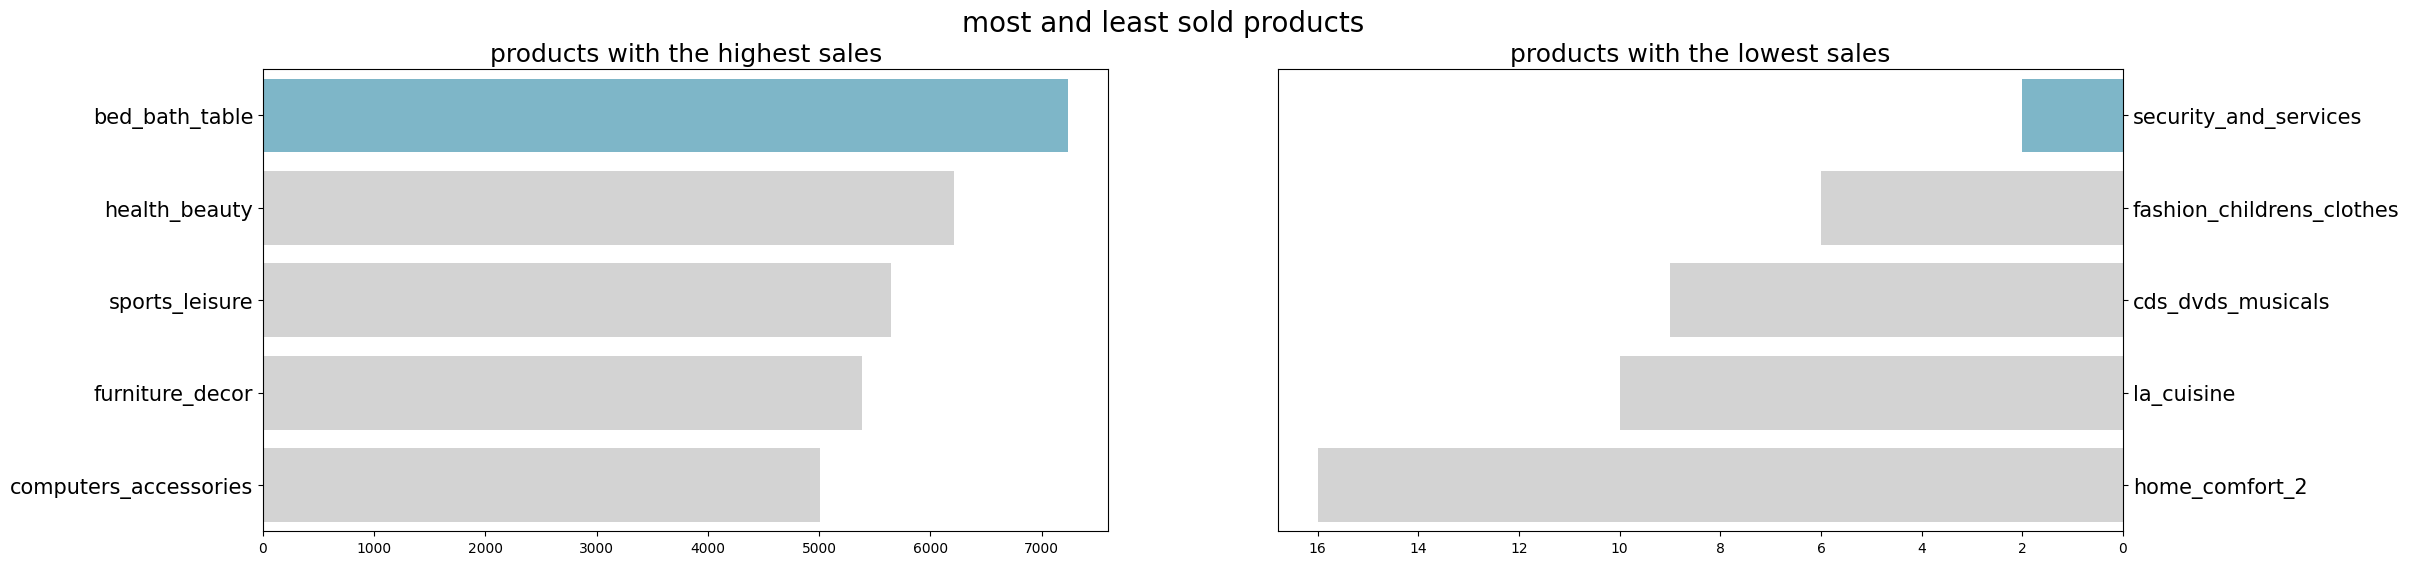

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("products with the highest sales", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="product_id", y="product_category_name_english", data=sorted_df.sort_values(by="product_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("products with the lowest sales", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("most and least sold products", fontsize=20)
plt.show()

In [164]:
x=all_df['review_score'].value_counts().sort_values(ascending=False)

In [165]:
x.index

Float64Index([5.0, 4.0, 1.0, 3.0, 2.0], dtype='float64')

In [161]:
x.values

array([42972, 14581,  9880,  6416,  2677])

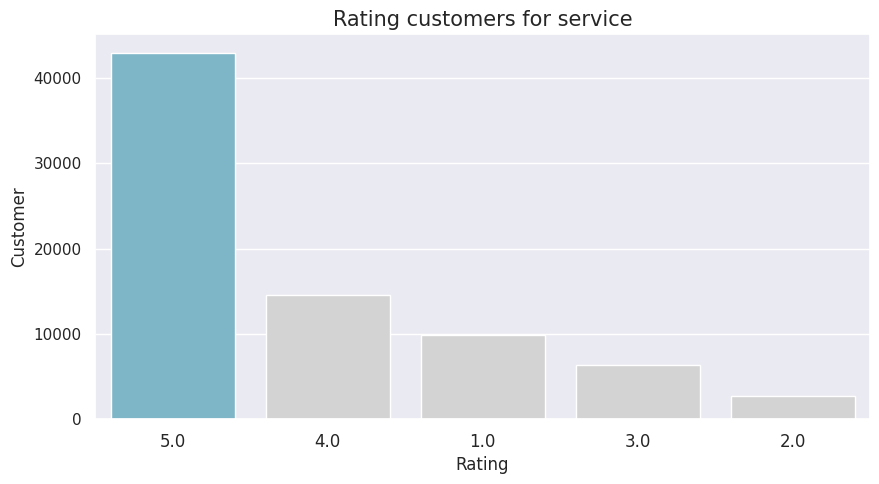

In [166]:
rating_service = all_df['review_score'].value_counts().sort_values(ascending=False)

max_score = rating_service.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=rating_service.index,
            y=rating_service.values,
            order=rating_service.index,
            palette=["#72BCD4" if score == max_score else "#D3D3D3" for score in rating_service.index]
            )

plt.title("Rating customers for service", fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Customer")
plt.xticks(fontsize=12)
plt.show()

In [167]:
sum_spend_df = all_df.resample(rule='M', on='order_approved_at').agg({
            "price": "sum"
})
sum_spend_df = sum_spend_df.reset_index()
sum_spend_df.rename(columns={
            "price": "total_spend"
        }, inplace=True)

sum_spend_df

,order_approved_at,total_spend
0,2016-09-30,134.97
1,2016-10-31,32020.09
2,2016-11-30,0.00
3,2016-12-31,10.90
4,2017-01-31,80839.89
5,2017-02-28,151887.99
6,2017-03-31,252892.17
7,2017-04-30,236246.40
8,2017-05-31,344864.59
9,2017-06-30,288608.27


# New Section

In [168]:
sum_spend_df['order_approved_at'] = sum_spend_df['order_approved_at'].dt.strftime('%B')

sum_spend_df

,order_approved_at,total_spend
0,September,134.97
1,October,32020.09
2,November,0.00
3,December,10.90
4,January,80839.89
5,February,151887.99
6,March,252892.17
7,April,236246.40
8,May,344864.59
9,June,288608.27


In [169]:
sum_spend_df = sum_spend_df.sort_values('total_spend').drop_duplicates('order_approved_at', keep='last')
sum_spend_df

,order_approved_at,total_spend
12,September,401452.99
13,October,431108.42
15,December,498033.36
17,February,546176.38
22,July,558042.97
23,August,571117.29
21,June,580102.39
16,January,602781.98
19,April,628016.78
18,March,642292.86


In [170]:
custom_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column based on the custom order
sum_spend_df['month_cat'] = pd.Categorical(sum_spend_df['order_approved_at'], categories=custom_order, ordered=True)

# Sort the DataFrame based on the categorical column
sorted_df = sum_spend_df.sort_values(by='month_cat')

# Remove the 'month_cat' column if you don't need it
sorted_df = sorted_df.drop(columns=['month_cat'])

print(sorted_df)

   order_approved_at  total_spend
16           January    602781.98
17          February    546176.38
18             March    642292.86
19             April    628016.78
20               May    648122.64
21              June    580102.39
22              July    558042.97
23            August    571117.29
12         September    401452.99
13           October    431108.42
14          November    657018.96
15          December    498033.36


In [171]:
#total spend
sum_spend_df['total_spend'].sum()

6764267.02

In [172]:
sum_spend_df['total_spend'].mean()

563688.9183333333

JUmlah pembelian tiap bulan

In [173]:
monthly_df = all_df.resample(rule='M', on='order_approved_at').agg({
    "order_id": "size",
})
monthly_df

,order_id
order_approved_at,
2016-09-30,3
2016-10-31,252
2016-11-30,0
2016-12-31,1
2017-01-31,632
2017-02-28,1342
2017-03-31,2176
2017-04-30,1838
2017-05-31,2887


In [174]:
monthly_df.index

DatetimeIndex(['2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30'],
              dtype='datetime64[ns]', name='order_approved_at', freq=None)

In [176]:
monthly_df.index = monthly_df.index.strftime('%B') #mengubah format order_approved_at menjadi Tahun-Bulan
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_df

,order_approved_at,order_count
0,September,3
1,October,252
2,November,0
3,December,1
4,January,632
5,February,1342
6,March,2176
7,April,1838
8,May,2887
9,June,2519


In [177]:
monthly_df = monthly_df.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')

In [178]:
monthly_df

,order_approved_at,order_count
12,September,3360
13,October,3582
15,December,4424
22,July,4702
21,June,4734
23,August,5033
19,April,5198
17,February,5266
20,May,5525
16,January,5540


In [179]:
month_mapping = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12
}

monthly_df["month_numeric"] = monthly_df["order_approved_at"].map(month_mapping)
monthly_df = monthly_df.sort_values("month_numeric")
monthly_df = monthly_df.drop("month_numeric", axis=1)

In [180]:
monthly_df

,order_approved_at,order_count
16,January,5540
17,February,5266
18,March,5643
19,April,5198
20,May,5525
21,June,4734
22,July,4702
23,August,5033
12,September,3360
13,October,3582


In [181]:
monthly_df[monthly_df['order_count'] == monthly_df['order_count'].max()]['order_approved_at'].values[0]

'November'

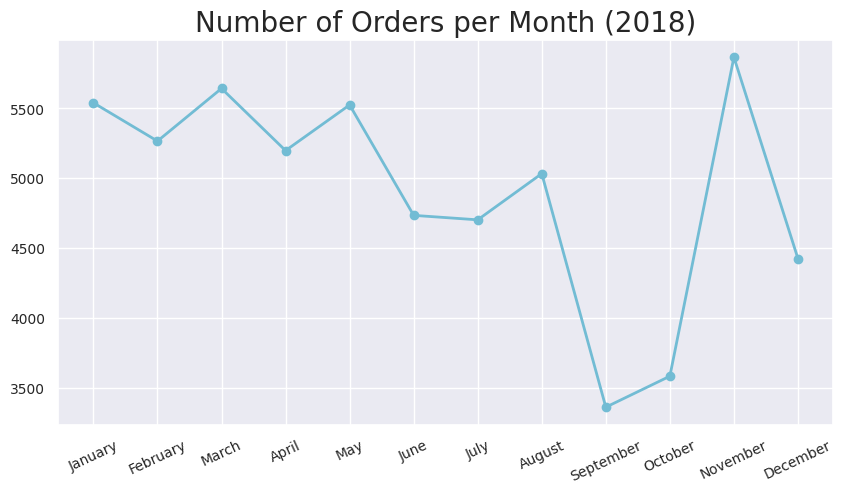

In [182]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_df["order_approved_at"],
    monthly_df["order_count"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

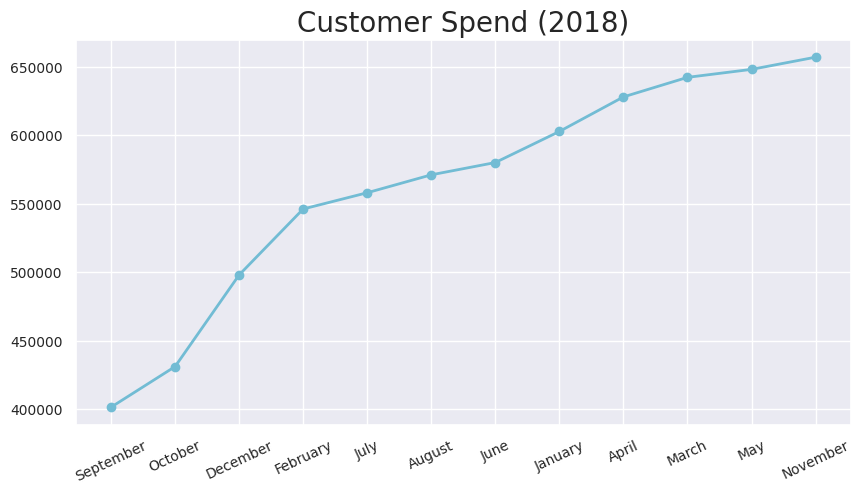

In [183]:
plt.figure(figsize=(10, 5))
plt.plot(
    sum_spend_df["order_approved_at"],
    sum_spend_df["total_spend"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Customer Spend (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

#### Melihat visualisasi **RFM**

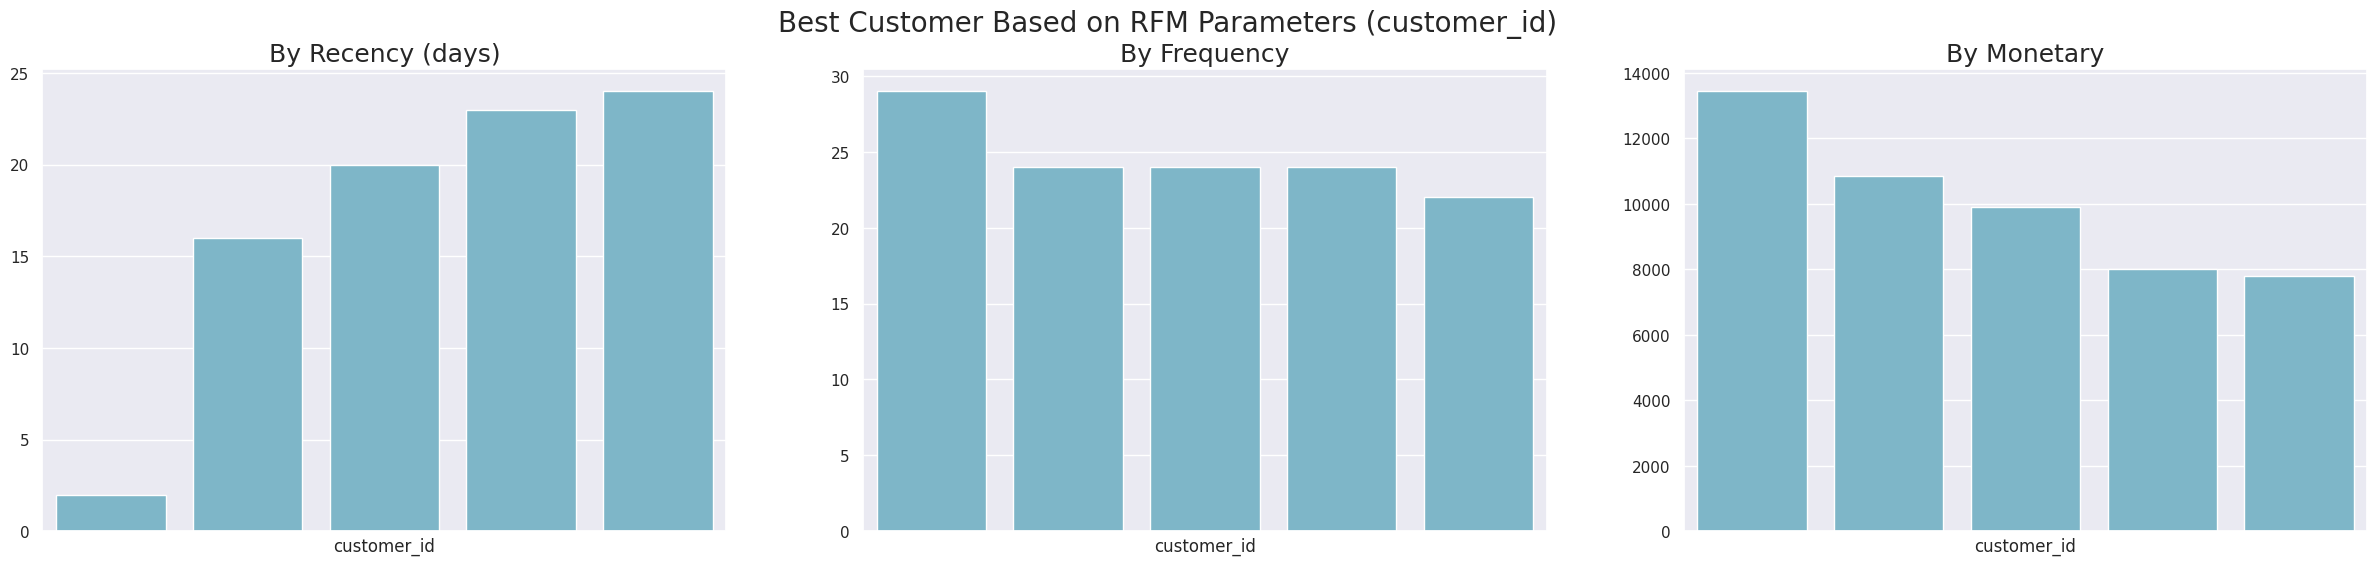

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# beri comentar pada ax[index].set_xticks([]) bila ingin melihat customer nya by id


sns.barplot(y="Recency", x="customer_id", data=rfm.sort_values(by="Recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("customer_id")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_xticks([])


sns.barplot(y="Frequency", x="customer_id", data=rfm.sort_values(by="Frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('customer_id')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticks([])


sns.barplot(y="Monetary", x="customer_id", data=rfm.sort_values(by="Monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('customer_id')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[2].set_xticks([])


plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

### **Jawaban**




*   Produk apa dengan jumlah pembelian terbesar?
*   Berapa tingkat kepuasan pembeli terhadap layanan?
*   Bagaimana data pembelian order setiap bulan




Produk apa dengan jumlah pembelian terbesar?
Berdasarkan data yang divisualisasikan,pembelian customer terbesar ada pada produk beth_bad_table dan pembelian produk terkecil pada security_and_service

Berapa tingkat kepuasan pembeli terhadap layanan?
Tingkat Kepuasan sebagian Customer memuaskan,hal ini dapat dibuktikan berdasarkan data yang divisualisasikan,nilai rating pada kebanyakan customer berikan pada nilai sempurna,yakni nilai 5,dengan nilai rata-rata diangka 4 jika dibulatkan

Bagaimana data pembelian order setiap bulan
data pembelian customer bernilai fluaktif,dengan kata lain nilai dari pembelian customer setiap bulan ada kenaikan dan terkadang ada penurunan,yang dimana berdasarkan data terkait puncak pembelian maksimum customer ada pada bulan November dan puncak pembelian minimum customer ada pada bulan September

### Dasboard StreamLit

In [185]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [186]:
%%writefile app.py

Writing app.py


In [187]:
! wget -q -O - ipv4.icanhazip.com

34.41.179.251


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 8c149fc8426414c


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.41.179.251:8501

npx: installed 22 in 5.792s
your url is: https://legal-taxis-send.loca.lt
